In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [2]:
from mle_toolbox import load_result_logs
from mle_toolbox.utils import load_meta_log


import os
import sys

sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from utils.visualize_experiments import (plot_roi_subject_grid, plot_average_scores, get_norm_score,
                                         plot_bo_scores, plot_perf_per_layer, plot_best_layer,
                                         plot_combined_scores)

In [3]:
num_bo_iters = 25
num_layers = 5

In [5]:
experiment_dir = "../data/experiments/roi/compression/pls_pca_50_resnet50_bo_25"
meta_log, hyper_log = load_result_logs(experiment_dir)

In [6]:
hyper_log.best_bo_score.mean()

0.2684175231390529

# Bayesian Optimization Procedure Across Network Feature Layers

../utils/visualize_experiments.py:84: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  eval_id = hyper_log.hyper_log[hyper_log.hyper_log.subject_id == subject_id][hyper_log.hyper_log.roi_type == roi_type].run_id.iloc[0]


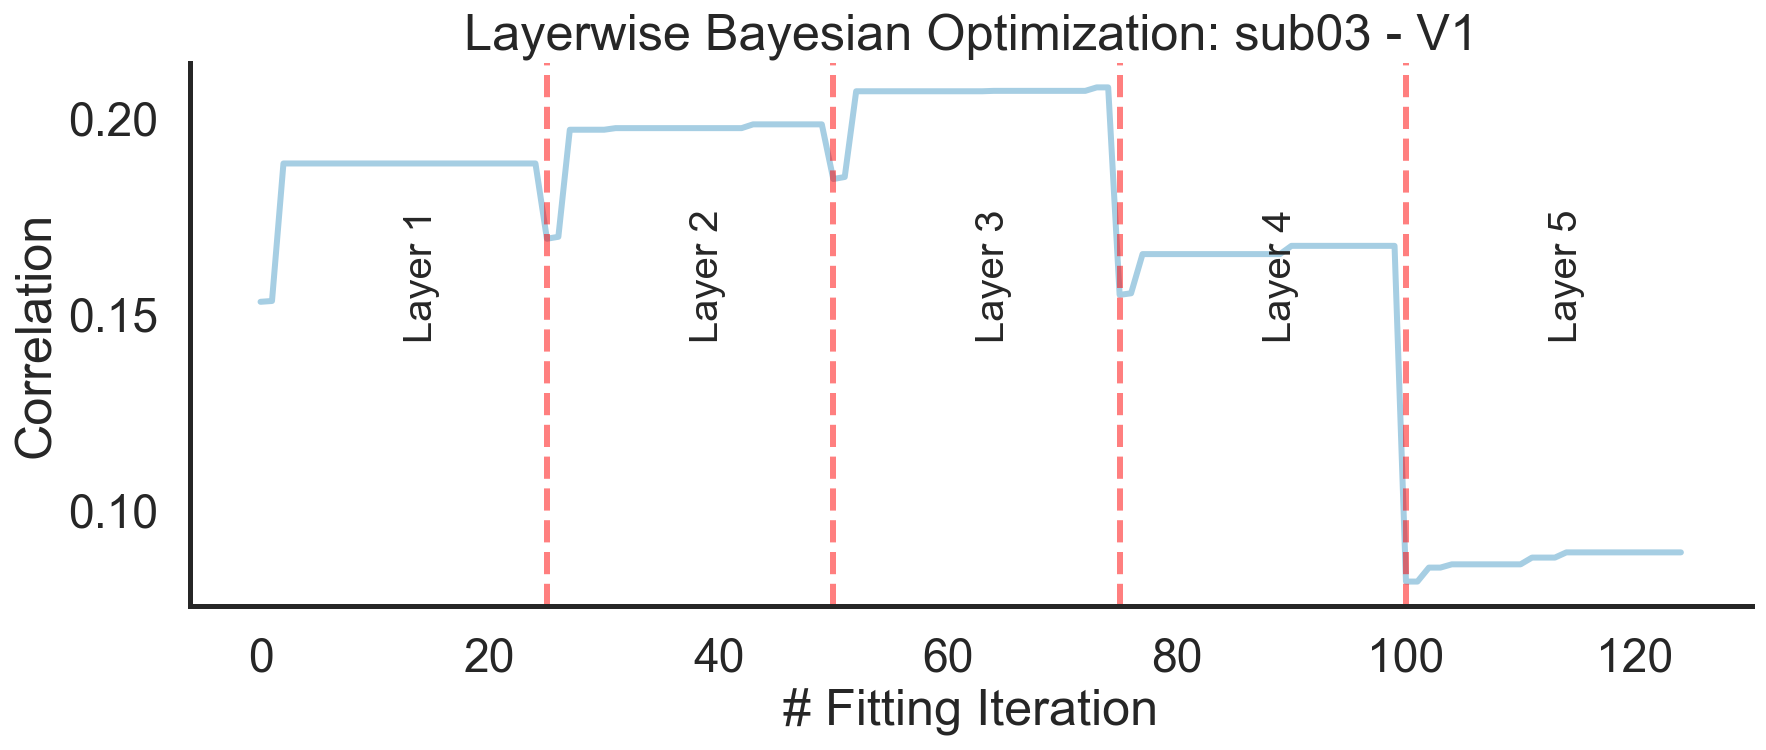

In [16]:
plot_bo_scores(meta_log, hyper_log, subject_id="sub03", roi_type="V1", num_bo_per_layer=num_bo_iters, num_layers=num_layers)

# Performance Across Subjects and ROIs

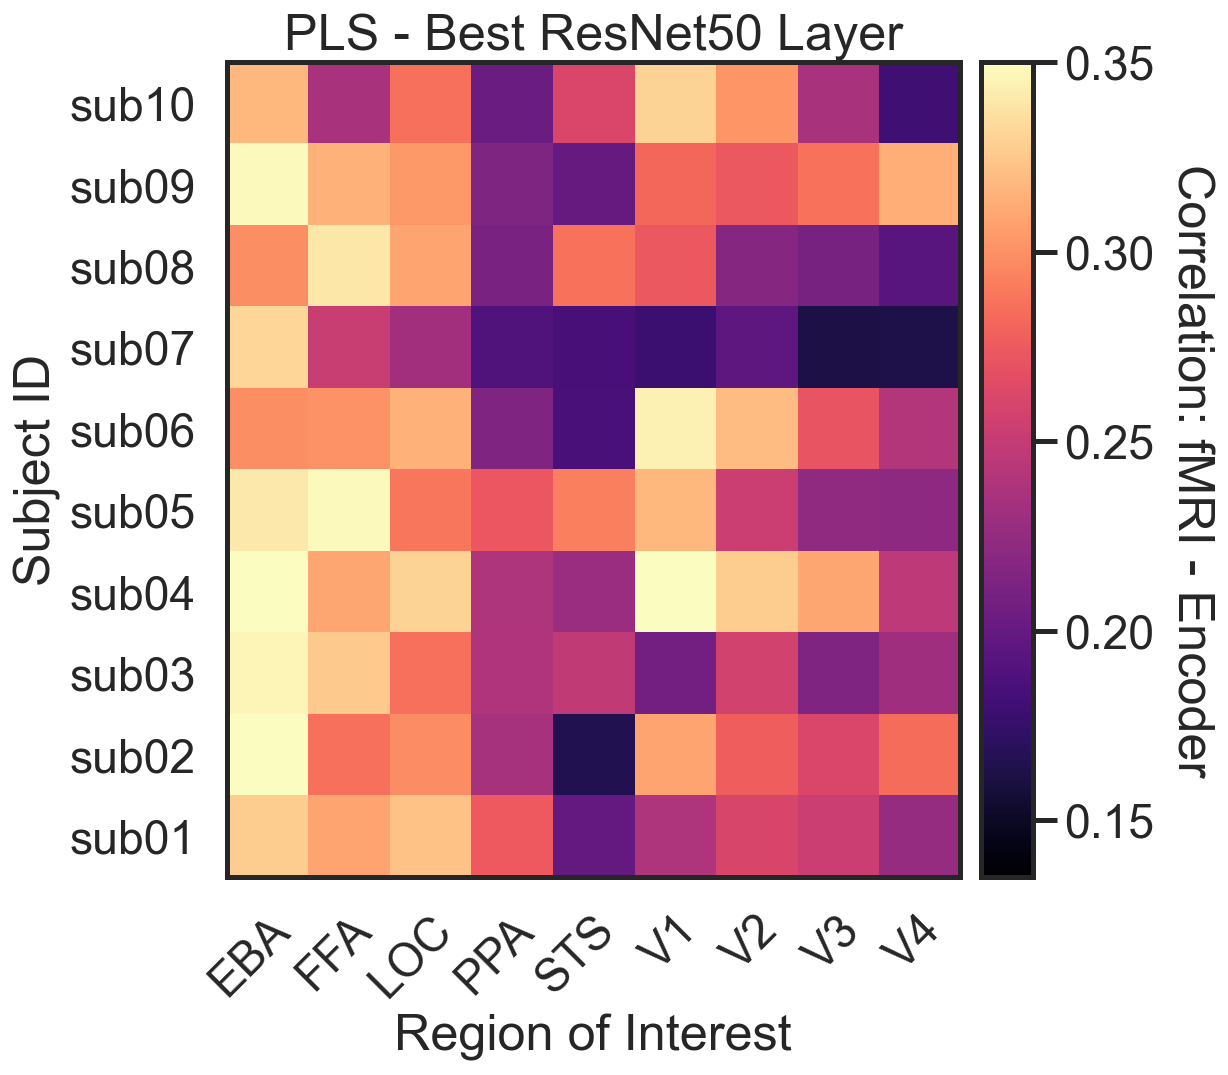

In [17]:
plot_roi_subject_grid(hyper_log, title="PLS - Best ResNet50 Layer")

[0.33942554 0.30460213 0.29919037 0.23826842 0.22258705 0.2896858
 0.27076693 0.2454002  0.2359832 ]


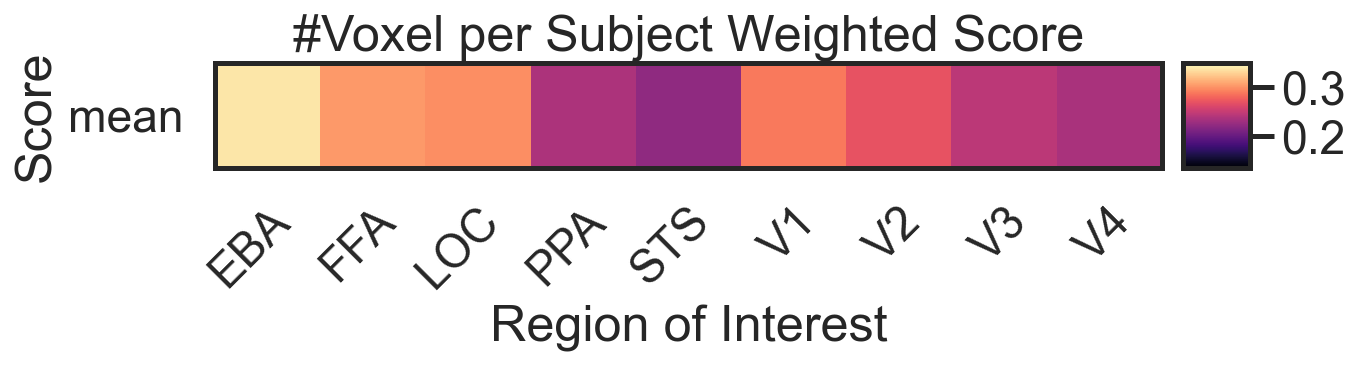

In [18]:
get_norm_score(hyper_log, plot=True)

# Performance Per Layer

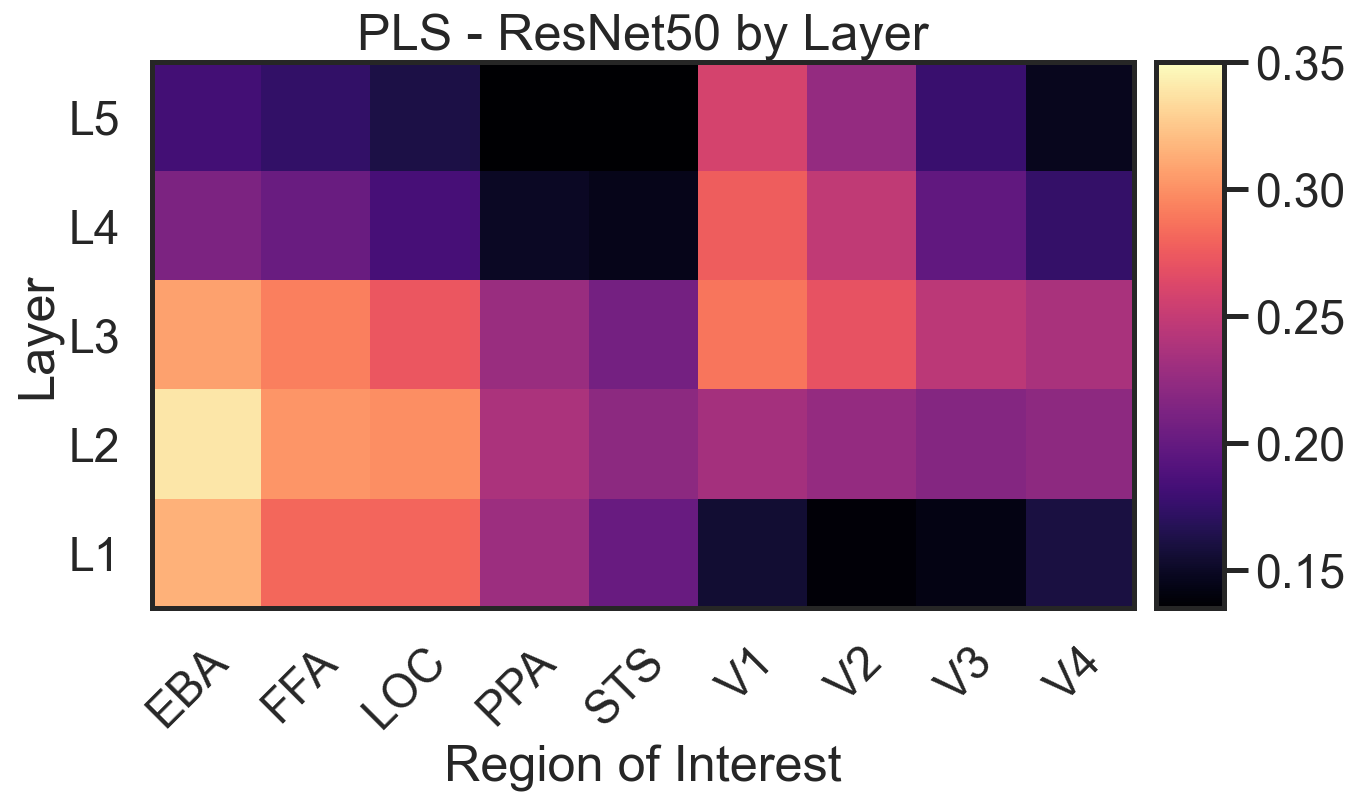

In [19]:
plot_perf_per_layer(hyper_log, meta_log, num_bo_per_layer=25, num_layers=5, title="PLS - ResNet50 by Layer")

# Feature Compression Comparison

In [23]:
meta_log_50, hyper_log_50 = load_result_logs("../data/experiments/roi/compression/pls_pca_50_resnet50_bo_25")
meta_log_100, hyper_log_100 = load_result_logs("../data/experiments/roi/compression/pls_pca_100_resnet50_bo_25")
meta_log_250, hyper_log_250 = load_result_logs("../data/experiments/roi/compression/pls_pca_250_resnet50_bo_25")

pca_50 = get_norm_score(hyper_log_50)
pca_100 = get_norm_score(hyper_log_100)
pca_250 = get_norm_score(hyper_log_250)

print(30*"=")
meta_log_50, hyper_log_50 = load_result_logs("../data/experiments/roi/compression/pls_umap_50_resnet50_bo_25")
meta_log_100, hyper_log_100 = load_result_logs("../data/experiments/roi/compression/pls_umap_100_resnet50_bo_25")
meta_log_250, hyper_log_250 = load_result_logs("../data/experiments/roi/compression/pls_umap_250_resnet50_bo_25")

umap_50 = get_norm_score(hyper_log_50)
umap_100 = get_norm_score(hyper_log_100)
umap_250 = get_norm_score(hyper_log_250)

print(30*"=")
meta_log_50, hyper_log_50 = load_result_logs("../data/experiments/roi/compression/pls_mds_50_resnet50_bo_25")
meta_log_100, hyper_log_100 = load_result_logs("../data/experiments/roi/compression/pls_mds_100_resnet50_bo_25")
meta_log_250, hyper_log_250 = load_result_logs("../data/experiments/roi/compression/pls_mds_250_resnet50_bo_25")

mds_50 = get_norm_score(hyper_log_50)
mds_100 = get_norm_score(hyper_log_100)
mds_250 = get_norm_score(hyper_log_250)

print(30*"=")
meta_log_50, hyper_log_50 = load_result_logs("../data/experiments/roi/compression/pls_autoencoder_50_resnet50_bo_25")
meta_log_100, hyper_log_100 = load_result_logs("../data/experiments/roi/compression/pls_autoencoder_100_resnet50_bo_25")
meta_log_250, hyper_log_250 = load_result_logs("../data/experiments/roi/compression/pls_autoencoder_250_resnet50_bo_25")

autoencoder_50 = get_norm_score(hyper_log_50)
autoencoder_100 = get_norm_score(hyper_log_100)
autoencoder_250 = get_norm_score(hyper_log_250)

[0.33942554 0.30460213 0.29919037 0.23826842 0.22258705 0.2896858
 0.27076693 0.2454002  0.2359832 ]
[0.32510277 0.29380174 0.28471584 0.22370557 0.20413307 0.27984372
 0.25911292 0.23227961 0.21918852]
[0.28410743 0.25138173 0.24569472 0.18414349 0.16837989 0.2539016
 0.23417934 0.20749482 0.19357519]
[0.29606857 0.27159911 0.25696171 0.20536804 0.20388058 0.20534238
 0.19034038 0.17579684 0.18361677]
[0.29377299 0.26862007 0.25450451 0.21224569 0.20068574 0.20792524
 0.1930476  0.17420439 0.18397074]
[0.29603814 0.27017312 0.25833713 0.21646702 0.20051071 0.2094153
 0.19218518 0.17682983 0.18621988]
[0.32882601 0.29881855 0.28888397 0.23471566 0.21974854 0.28044413
 0.25943151 0.23316769 0.22469002]
[0.3275927  0.29979515 0.28712597 0.23448461 0.21610103 0.27890658
 0.25948152 0.22957396 0.21890821]
[0.31495313 0.29402007 0.27455803 0.23105193 0.21537981 0.2597583
 0.24198644 0.21363603 0.20568906]
[0.31449711 0.28024927 0.27521972 0.22483931 0.20643908 0.22630191
 0.22059016 0.21103

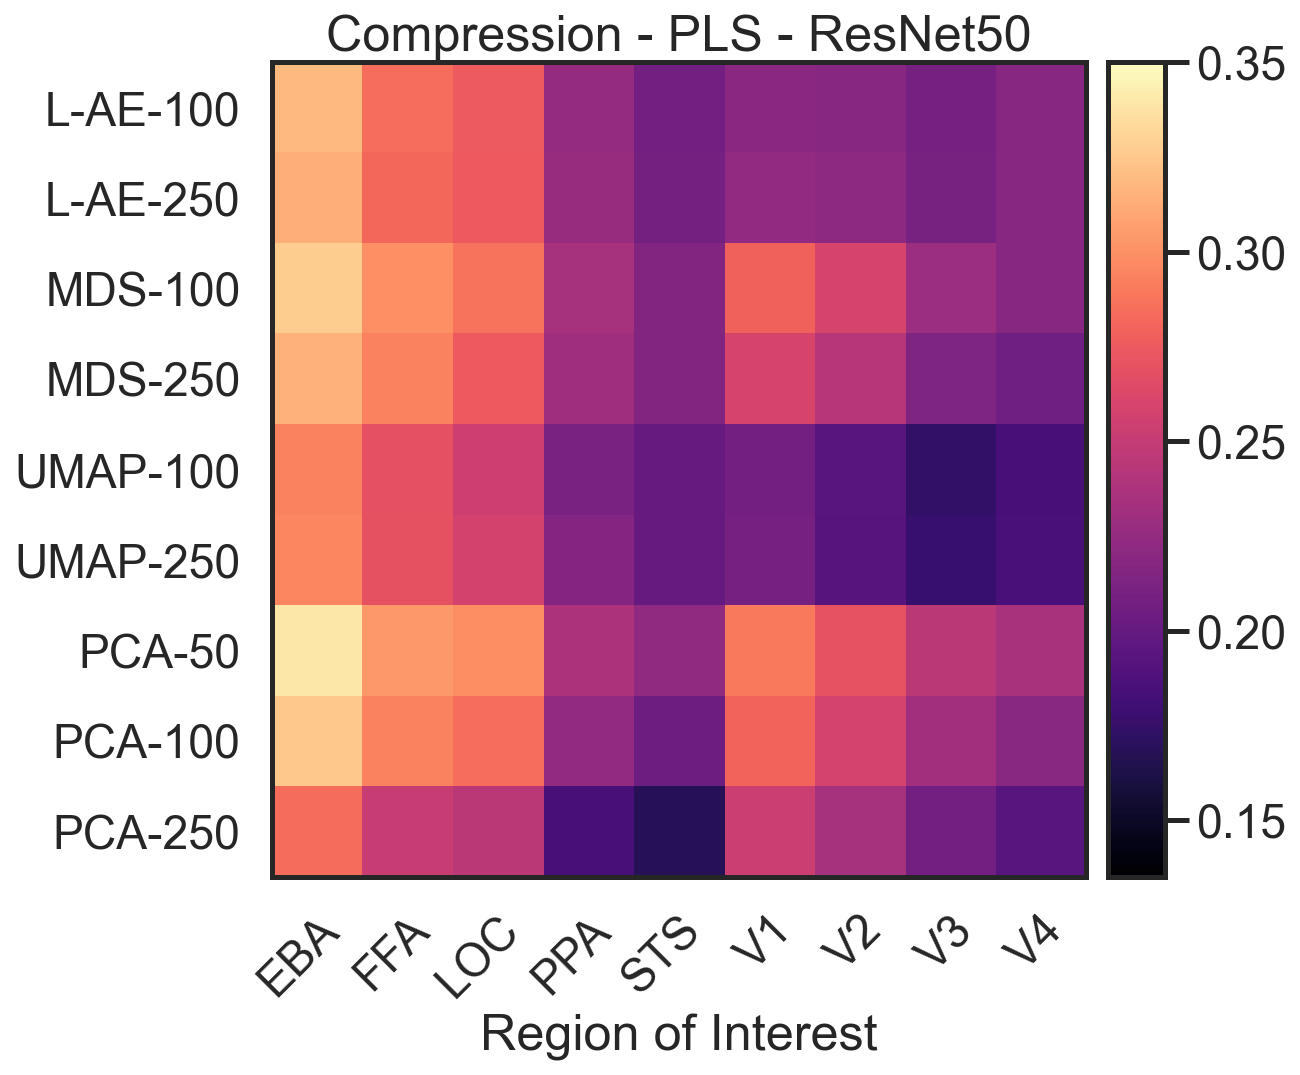

In [27]:
scores = [autoencoder_100, autoencoder_250,
          mds_100, mds_250,
          umap_100, umap_250,
          pca_50, pca_100, pca_250]
range_y = ['L-AE-100', "L-AE-250",
           "MDS-100", "MDS-250",
           "UMAP-100", "UMAP-250",
           "PCA-50", "PCA-100", "PCA-250"][::-1]
range_x = ["EBA", "FFA", "LOC", "PPA", "STS", "V1", "V2", "V3", "V4"] 
title = "Compression - PLS - ResNet50"
ylabel = None #"Compression Technique"
plot_combined_scores(scores, range_x, range_y, title, ylabel,
                     min_heat=0.135, max_heat=0.35)

# Architecture Comparison

In [31]:
meta_log_alex, hyper_log_alex = load_result_logs("../data/experiments/roi/architectures/pls_pca_50_alexnet_bo_25")
meta_log_vgg, hyper_log_vgg = load_result_logs("../data/experiments/roi/architectures/pls_pca_50_vgg_bo_25")
meta_log_r18, hyper_log_r18 = load_result_logs("../data/experiments/roi/architectures/pls_pca_50_resnet18_bo_25")
meta_log_r34, hyper_log_r34 = load_result_logs("../data/experiments/roi/architectures/pls_pca_50_resnet34_bo_25")
meta_log_r50, hyper_log_r50 = load_result_logs("../data/experiments/roi/compression/pls_pca_50_resnet50_bo_25")
meta_log_r101, hyper_log_r101 = load_result_logs("../data/experiments/roi/architectures/pls_pca_50_resnet101_bo_25")
meta_log_r152, hyper_log_r152 = load_result_logs("../data/experiments/roi/architectures/pls_pca_50_resnet152_bo_25")
meta_log_eff, hyper_log_eff = load_result_logs("../data/experiments/roi/architectures/pls_pca_50_efficientnet_b3_bo_25")
meta_log_rnext, hyper_log_rnext = load_result_logs("../data/experiments/roi/architectures/pls_pca_50_resnext50_32x4d_bo_25")


alexnet = get_norm_score(hyper_log_alex)
vgg = get_norm_score(hyper_log_vgg)
r18 = get_norm_score(hyper_log_r18)
r34 = get_norm_score(hyper_log_r34)
r50 = get_norm_score(hyper_log_r50)
r101 = get_norm_score(hyper_log_r101)
r152 = get_norm_score(hyper_log_r152)
enet = get_norm_score(hyper_log_eff)
rnext = get_norm_score(hyper_log_rnext)

[0.30573749 0.29174114 0.2672166  0.22565845 0.21118222 0.27955577
 0.2538552  0.21985578 0.20909417]
[0.33175135 0.30422405 0.29096965 0.22894857 0.21705948 0.28504156
 0.25773851 0.22487886 0.22499617]
[0.33510145 0.30123672 0.29044812 0.22648133 0.21800347 0.29419984
 0.27655564 0.24472115 0.22956333]
[0.33918029 0.3065165  0.29758833 0.23263551 0.22278227 0.28970167
 0.27070855 0.24462405 0.23650492]
[0.33942554 0.30460213 0.29919037 0.23826842 0.22258705 0.2896858
 0.27076693 0.2454002  0.2359832 ]
[0.34221185 0.31274836 0.30271019 0.23913943 0.22700942 0.2857113
 0.27054667 0.24924287 0.24223315]
[0.3446597  0.31498121 0.3055256  0.24434963 0.22549823 0.28378085
 0.26901083 0.24997533 0.24694798]
[0.33265759 0.30474351 0.29354968 0.2348559  0.22089037 0.29116248
 0.26981707 0.23470164 0.21819677]
[0.34137619 0.30874911 0.29507281 0.2423055  0.22753013 0.28522069
 0.26880395 0.24566582 0.2399894 ]


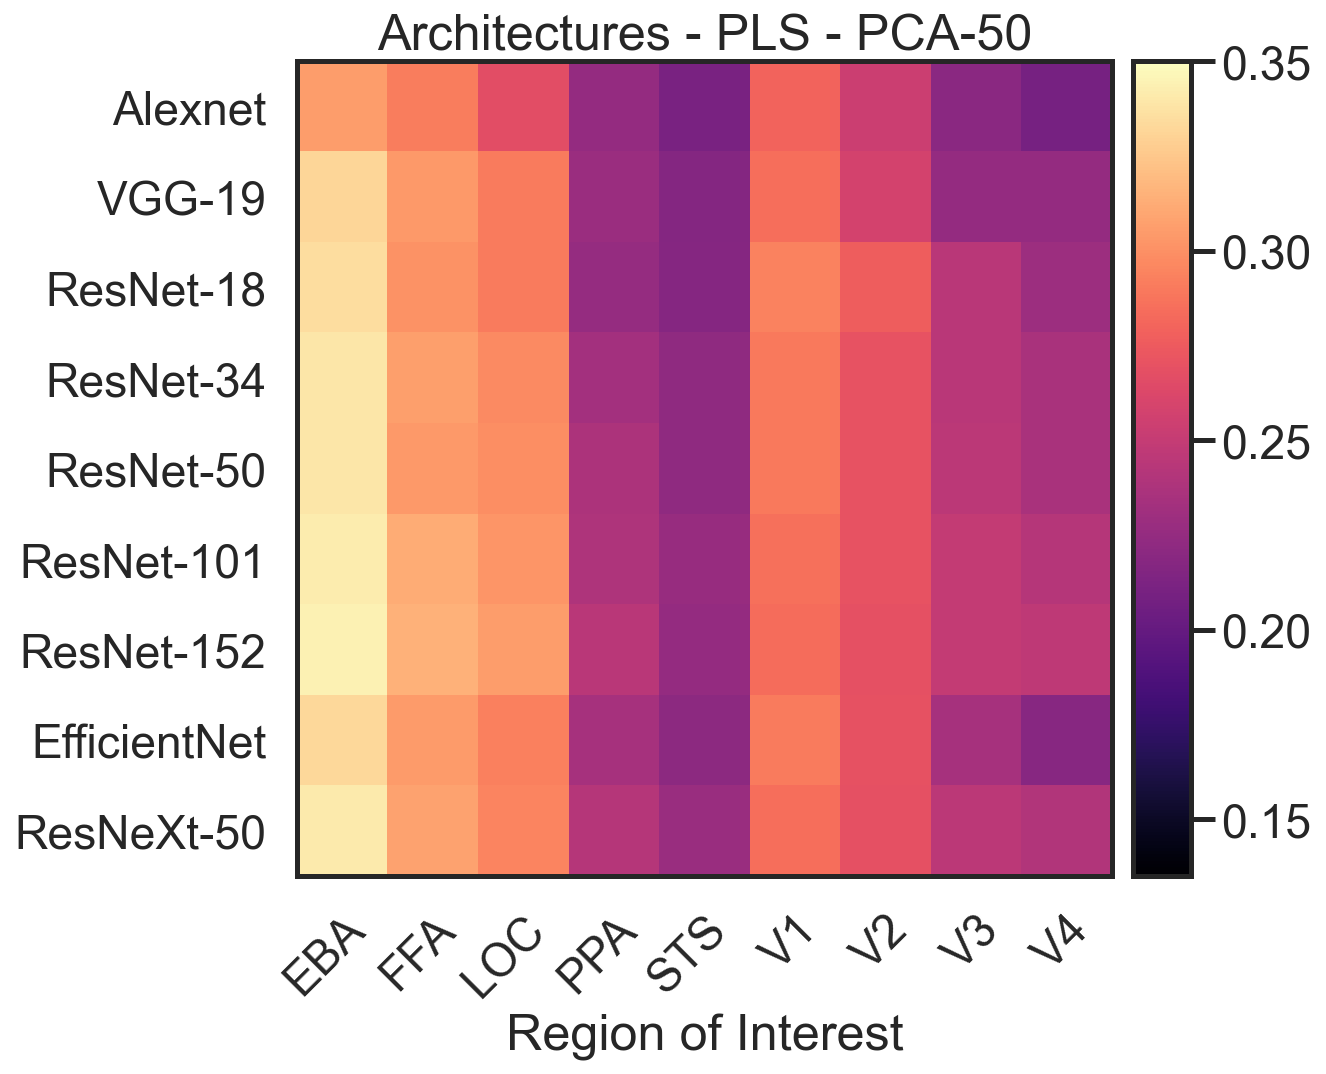

In [33]:
scores = [alexnet, vgg,
          r18, r34, r50, r101, r152,
          enet, rnext]
range_y = ['Alexnet', "VGG-19",
           "ResNet-18", "ResNet-34",
           "ResNet-50", "ResNet-101", "ResNet-152",
           "EfficientNet", "ResNeXt-50"][::-1]
range_x = ["EBA", "FFA", "LOC", "PPA", "STS", "V1", "V2", "V3", "V4"] 
title = "Architectures - PLS - PCA-50"
ylabel = None
plot_combined_scores(scores, range_x, range_y, title, ylabel,
                     min_heat=0.135, max_heat=0.35)

# Encoding Model Comparison

In [ ]:
meta_log_ols, hyper_log_ols = load_result_logs("../data/experiments/roi/ols_pca_50_resnet50_bo_25")
meta_log_elastic, hyper_log_elastic = load_result_logs("../data/experiments/roi/elastic_pca_50_resnet50_bo_25")
meta_log_mlp, hyper_log_mlp = load_result_logs("../data/experiments/roi/mlp_pca_50_resnet50_bo_25")
meta_log_pls, hyper_log_pls = load_result_logs("../data/experiments/roi/pls_50_resnet50_bo_25")
meta_log_cca, hyper_log_cca = load_result_logs("../data/experiments/roi/cca_pca_50_resnet50_bo_25")
meta_log_cpls, hyper_log_cpls = load_result_logs("../data/experiments/roi/cpls_pca_50_resnet50_bo_25")


ols = get_norm_score(hyper_log_ols)
elastic = get_norm_score(hyper_log_elastic)
mlp = get_norm_score(hyper_log_mlp)
pls = get_norm_score(hyper_log_pls)
cca = get_norm_score(hyper_log_cca)
cpls = get_norm_score(hyper_log_cpls)


In [ ]:
scores = [ols, elastic, mlp, pls, cca, cpls]
range_y = ['OLS', "Elastic", "MLP", "PLS", "CCA", "C-PLS"][::-1]
range_x = ["EBA", "FFA", "LOC", "PPA", "STS", "V1", "V2", "V3", "V4"] 
title = "Encoders - PCA-50 - ResNet50"
ylabel = None
plot_combined_scores(scores, range_x, range_y, title, ylabel,
                     min_heat=0.12, max_heat=0.34)

# Best Layer Per ROI/Subject

In [ ]:
plot_best_layer(hyper_log, meta_log, num_layers=5,
                num_bo_per_layer=50,
                title="Best Resnext50 Layer per Subject/ROI:")

# ImageNet Validation Scores

In [ ]:
import pandas as pd

df = pd.read_csv("../data/imagenet_val_scores.csv", index_col=0)
x_labels = df['model_type'].tolist()[::-1]

fig, ax = plt.subplots(figsize=(13,8))
ax.barh(np.arange(df.shape[0]), df["top1"][::-1])
ax.set_yticks(np.arange(df.shape[0]))
ax.set_yticklabels(x_labels, rotation=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Validation Accuracy")
ax.set_title("ImageNet Validation Accuracy")
ax.set_xlim(0.55, 0.81)